*Matplotlib* is a comprehensive and open-source library for producing various types of visualizations in Python. It is important to know what version of *matplotlib* you have on your system. Some of the features we use in the following like "bar_label" have been recently added to matplotlib at the time of writing. In case you have an older version of matplotlib, you can upgrade it using pip. Alternatively, you could just comment those lines with such features in the following code, and you should be fine. Here is how to know matplotlib's version on your system:

In [1]:
import matplotlib
matplotlib.__version__

'3.5.1'

In [2]:
!pip install matplotlib==3.5.1

In [3]:
import matplotlib
matplotlib.__version__


'3.5.1'

### VISUALIZATION WITH MATPLOTLIB | GROUPED BAR CHART WITH LABELS.

Let's say we have the sales data for two products: Product-A and Product-B over four quarters:

In [4]:
PA_means = [80, 62, 55, 65]
PB_means = [65, 72, 61, 85]

Here is total sales:

In [5]:
tot_sales = []
for ind, item in enumerate(PA_means):
    tot_sales.append(PA_means[ind]+PB_means[ind])
print(f'Total Sales: {tot_sales}')

Total Sales: [145, 134, 116, 150]


Here is a Python code snippet for producing a bar plot for this data:

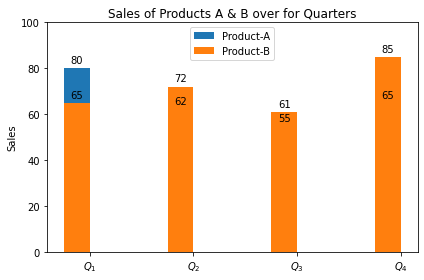

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

labels = ['$Q_1$', '$Q_2$', '$Q_3$', '$Q_4$']

# label locations: 1, 2, 3, and 4
x= np.arange(len(labels))

#width of bars
bar_width = 0.25

fig, ax = plt.subplots()
bar1 = ax.bar(x - bar_width/2, PA_means, bar_width, label='Product-A')
bar2 = ax.bar(x - bar_width/2, PB_means, bar_width, label='Product-B')

# setting the y-axis labels
ax.set_ylabel('Sales')

#setting the title of the figure
ax.set_title('Sales of Products A & B over for Quarters')

# setting values
ax.set_xticks(x)

#setting x- axis tick labels
ax.set_xticklabels(labels)

#limit of y-axis
ax.set_ylim(0, 100)

#adding legend with customized location
ax.legend(loc = 'upper center')

#adding labels on top of bars(supported in latest matplotlib 3.5.1)
ax.bar_label(bar1, padding=3)
ax.bar_label(bar2, padding=3)

#adjust the padding
fig.tight_layout()

### VISUALIZATION WITH MATPLOTLIB | STACKED BAR CHART WITH LABELS.

Now, let's see how to create a stacked bar plot with error bars. Let us assume the following standard deviations for the sales data:

In [7]:
PA_std = [10, 5, 8, 5]
PB_std = [5, 10, 5, 8]
tot_std = [12, 12, 10, 10]

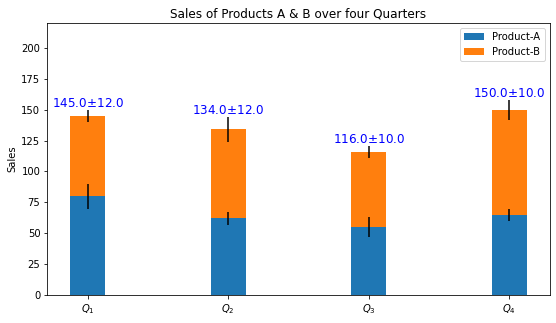

In [8]:
fig, ax = plt.subplots(figsize=(9,5))

bar1 = ax.bar(labels, PA_means, bar_width, yerr=PA_std, label='Product-A')
bar2 = ax.bar(labels, PB_means, bar_width, yerr=PB_std, bottom=PA_means, label='Product-B')

ax.set_ylabel('Sales')
ax.set_title('Sales of Products A & B over four Quarters')
ax.legend()

#creating a list for labels on top of bars
list_label = []
for ind in range(len(PA_std)):
    list_label.append('%.1f$\pm$%.1f'% (tot_sales[ind], tot_std[ind]))
    
# adding label on top of bars
ax.bar_label(bar2, labels=list_label,
            padding=0, color='b', fontsize=12);

#setring the upper limit of y-axis
ax.set_ylim(top=220);

### VISUALIZATION WITH MATPLOTLIB | HORIZONTAL BAR CHART WITH LABELS.

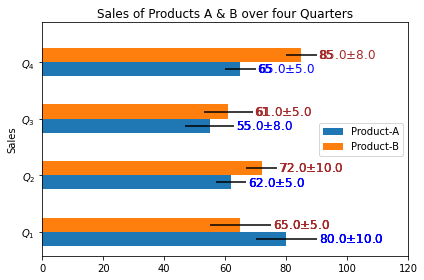

In [9]:
labels = ['$Q_1$', '$Q_2$', '$Q_3$', '$Q_4$']

#label locations: 1, 2, 3, and 4
y = np.arange(len(labels))

#width of bars
bar_width = 0.25

fig, ax = plt.subplots()
bar1 = ax.barh(y - bar_width/2, PA_means, bar_width, xerr=PA_std, label='Product-A')
bar2 = ax.barh(y + bar_width/2, PB_means, bar_width, xerr=PA_std, label='Product-B')

#setting the y-axis labels
ax.set_ylabel('Sales')

#setting title of figure
ax.set_title('Sales of Products A & B over four Quarters')

#setting values
ax.set_yticks(y)

#setting x-axis tick labels
ax.set_yticklabels(labels)

#limit of axis
ax.set_xlim(0, 120)
ax.set_ylim(top=3.7)

#adding legend with customized location
ax.legend(loc='center right')

#creating a list for labels on top of bars
list_labelA = []
list_labelB = []
for ind in range(len(PA_std)):
    list_labelA.append('%.1f$\pm$%.1f'% (PA_means[ind], PA_std[ind]))
    list_labelB.append('%.1f$\pm$%.1f'% (PB_means[ind], PB_std[ind]))
    
    #adding labels on top of bars
    ax.bar_label(bar1, labels=list_labelA, padding=2, color='blue', fontsize=12)
    ax.bar_label(bar2, labels=list_labelB, padding=2, color='brown', fontsize=12)
    
    #labels read top-to-bottom
    ax.invert_yaxis()
    
    #adjust the padding
    fig.tight_layout()

### VISUALIZATION WITH MATPLOTLIB | LINE CHART.

Let's create a sample dataset for this data visualization task:

In [10]:
np.random.seed(123)
df1 = pd.DataFrame({
    'a': np.random.randn(1000),
    'b': np.random.randn(1000),
    'c': np.random.randn(1000),
},
columns=['a','b','c'],
)

def classify(x):
    this_class = 0
    if x[0] + x[1] > 1.5:
        this_class = 1;
    elif x[0]<0:
        this_class = 2;
    elif x[1]<0:
        this_class = 3;
    return this_class

df1['class'] = df1.apply(classify, axis=1)
df1

,a,b,c,class
0,-1.085631,-0.748827,-1.774224,2
1,0.997345,0.567595,-1.201377,1
2,0.282978,0.718151,1.096257,0
3,-1.506295,-0.999381,0.861037,2
4,-0.578600,0.474898,-1.520367,2
...,...,...,...,...
995,0.634763,0.845701,-0.075335,0
996,1.069919,-1.119923,-0.946199,3
997,-0.909327,-0.359297,2.040432,2
998,0.470264,-1.609695,1.015917,3


Python code example showing how to draw a line chart:

In [11]:
df1[['a', 'b', 'c']].cumsum()

,a,b,c
0,-1.085631,-0.748827,-1.774224
1,-0.088285,-0.181233,-2.975601
2,0.194693,0.536918,-1.879344
3,-1.311601,-0.462463,-1.018307
4,-1.890202,0.012435,-2.538674
...,...,...,...
995,-39.083561,11.464512,9.876729
996,-38.013642,10.344589,8.930530
997,-38.922969,9.985292,10.970962
998,-38.452706,8.375597,11.986879


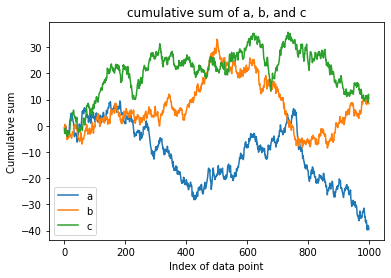

In [12]:
plt.plot(df1[['a','b','c']].cumsum(), label=df1.columns[:-1])
plt.ylabel('Cumulative sum')
plt.xlabel('Index of data point');
plt.legend(loc='lower left');
plt.title('cumulative sum of a, b, and c');

### VISUALIZATION WITH MATPLOTLIB | SUBPLOTS.

Here is the Python code example demonstrating how to create subplots with some formatting:

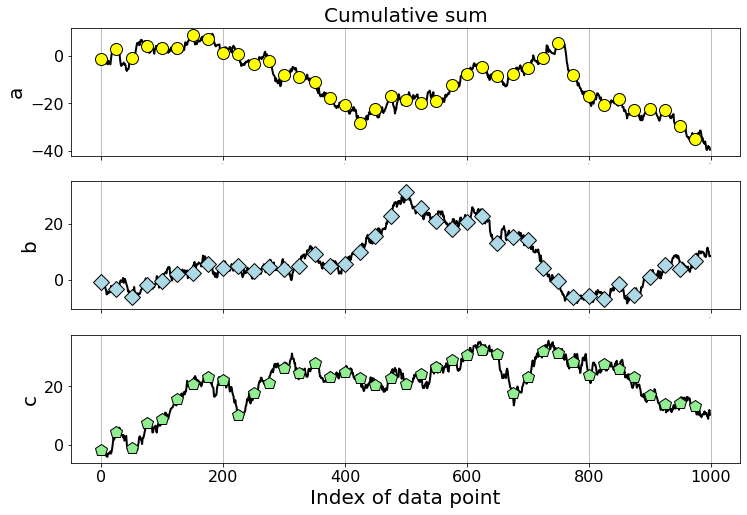

In [13]:
linestyle='solid'
color='k'
linewidth=2
marker='o'
markevery=25
markersize=12
markeredgewidth=1
markeredgecolor='k'
markerfacecolor='orangered'

fig, ax = plt.subplots(3,1, figsize=(12,8))

ax[0].plot(df1.a.cumsum(),
          linestyle=linestyle, color=color, linewidth=linewidth,
          marker=marker, markevery=markevery,
          markersize=markersize, markeredgewidth=markeredgewidth,
          markeredgecolor = markeredgecolor,
          markerfacecolor='yellow')
ax[0].tick_params(axis='y', which='major', labelsize=16)
ax[0].tick_params(axis='x', which='major', labelsize=0)
ax[0].grid(axis='x')
ax[0].set_ylabel('a', fontsize=20)
ax[0].set_title('Cumulative sum', fontsize=20)

ax[1].plot(df1.b.cumsum(),
          linestyle=linestyle, color=color, linewidth=linewidth,
          marker='D', markevery=markevery, markersize=markersize,
          markeredgewidth=markeredgewidth,
          markeredgecolor=markeredgecolor,
          markerfacecolor='lightblue')
ax[1].tick_params(axis='y', which='major', labelsize=16)
ax[1].tick_params(axis='x', which='major', labelsize=0)
ax[1].grid(axis='x')
ax[1].set_ylabel('b', fontsize=20)

ax[2].plot(df1.c.cumsum(),
          linestyle=linestyle, color=color, linewidth=linewidth,
          marker='p', markevery=markevery, markersize=markersize,
          markeredgewidth=markeredgewidth,
          markeredgecolor=markeredgecolor,
          markerfacecolor='lightgreen')
ax[2].tick_params(axis='y', which='major', labelsize=16)
ax[2].tick_params(axis='x', which='major', labelsize=16)
ax[2].grid(axis='x')
ax[2].set_ylabel('c', fontsize=20)
ax[2].set_xlabel('Index of data point', fontsize=20)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.2)

### VISUALIZATION WITH MATPLOTLIB | SCATTER PLOT

Here is a Python code example for drawing scatter plot:

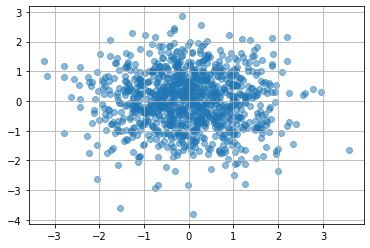

In [14]:
plt.scatter(df1.a, df1.b, alpha=0.5);
plt.grid()

The following Python code example demonstrates how to customize the scatter plot flexibly. More detailed information on different types of colormaps can be found from https://matplotlib.org/stable/tutorials/colors/colormaps.html.

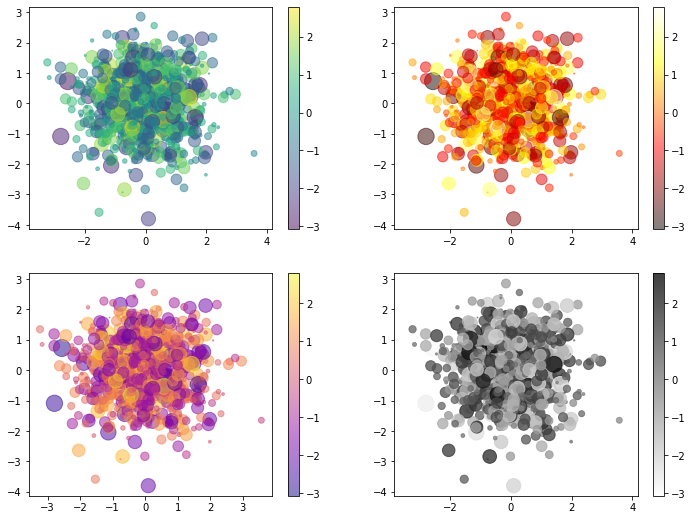

In [15]:
fig, ax = plt.subplots(2,2,figsize=(12,9))

sbp = ax[0,0].scatter(df1.a, df1.b, s=df1.c.apply(lambda x: 100*np.sqrt(x**2)),
                     c=df1.c, cmap='viridis', alpha=0.5);
fig.colorbar(sbp, ax=ax[0,0]);
ax[0,0].axis('equal');

sbp = ax[0,1].scatter(df1.a, df1.b, s=df1.c.apply(lambda x: 100*np.sqrt(x**2)),
                      c=df1.c, cmap='hot', alpha=0.5);
fig.colorbar(sbp, ax=ax[0,1]);
ax[0,1].axis('equal');

sbp = ax[1,0].scatter(df1.a, df1.b, s=df1.c.apply(lambda x: 100*np.sqrt(x**2)),
                     c=df1.c, cmap='plasma', alpha=0.5);
fig.colorbar(sbp, ax=ax[1,0]);
ax[0,1].axis('equal');

sbp = ax[1,1].scatter(df1.a, df1.b, s=df1.c.apply(lambda x: 100*np.sqrt(x**2)),
                     c=df1.c, cmap='binary', alpha=0.75);
fig.colorbar(sbp, ax=ax[1,1]);
ax[1,1].axis('equal');

### VISUALIZATION WITH MATPLOTLIB | SCATTER PLOT WITH HISTOGRAMS.

Scatter plot with histograms is another type insightful plot that can be produced using matplotlib. It consists of a scatter plot with marginal distributions of a scatter as histograms at the sides of the plot. The following Python code example demonstrate how to produce a scatter plot with histograms.

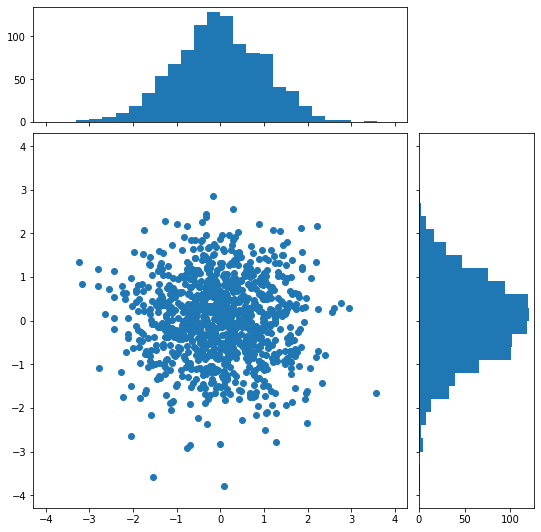

In [16]:
def sc_hist(x, y, ax_sc, ax_hx, ax_hy, bin_size=0.3, opt_format=False):
    # turning off target tick labels
    ax_hx.tick_params(axis='x', labelbottom=False)
    ax_hy.tick_params(axis='y', labelleft=False)
    
    #main scatter plot with some formatting:
    if opt_format:
        ax_sc.scatter(x, y, s=60, c=df1['class'], cmap='viridis',
                     edgecolor='black', linewidth=1, alpha=0.3)
    else:
        ax_sc.scatter(x,y)
            
    # finding limits
    tot_max = max(np.max(np.abs(x)), np.max(np.abs(y)))
    half_span = (int(tot_max/bin_size) + 1) * bin_size
        
    array_bins = np.arange(-half_span, half_span + bin_size, bin_size)
    ax_hx.hist(x, bins=array_bins)
    ax_hy.hist(y, bins=array_bins, orientation='horizontal')
        
#config of axes
left, width = 0.1, 0.65
bottom, height= 0.1, 0.65
spacing = 0.02
    
# rectangular frame for scatter and histogram plots
frame_sc = [left, bottom, width, height]
frame_hx = [left, bottom + height + spacing, width, 0.2]
frame_hy = [left + width + spacing, bottom, 0.2, height]
    
#initializing the figure
fig = plt.figure(figsize=(8,8))
    
#adding frames to figure
ax_sc = fig.add_axes(frame_sc)
ax_hx = fig.add_axes(frame_hx, sharex=ax_sc)
ax_hy =  fig.add_axes(frame_hy, sharey=ax_sc)
    
# creating scatter and histogram plots
#using the developed function above
    
sc_hist(x=df1.a, y=df1.b, ax_sc=ax_sc, ax_hx=ax_hx, ax_hy=ax_hy, bin_size=0.3)

And, here is the same plot with some formatting to specify the color of data points based on their class:

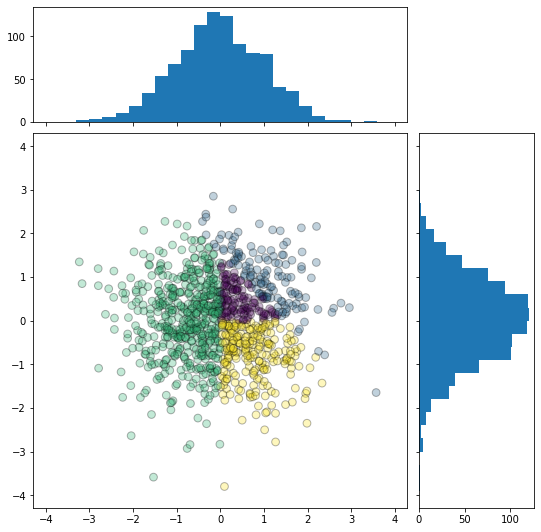

In [17]:
# config of axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.02

#rectangular frame for scatter and histogram plots
frame_sc = [left, bottom, width, height]
frame_hx = [left, bottom + height + spacing, width, 0.2]
frame_hy = [left + width + spacing, bottom, 0.2, height]

#initializing the figure
fig = plt.figure(figsize=(8, 8))

#adding frames to figure
ax_sc = fig.add_axes(frame_sc)
ax_hx = fig.add_axes(frame_hx, sharex=ax_sc)
ax_hy = fig.add_axes(frame_hy, sharey=ax_sc)

#creating scatter and histogram plots
#using the developed function above

sc_hist(x=df1.a, y=df1.b, ax_sc=ax_sc, ax_hx=ax_hx, ax_hy=ax_hy, bin_size=0.3, opt_format=True)

### VISUALIZATION WITH MATPLOTLIB | DISCRETE DISTRIBUTION AS HORIZONTAL BAR CHART

Let us quickly create a DataFrame representing our sample dataset for the rating data on multiple movies:

In [19]:
class_list = ['Great', 'Good', 'Fair', 'Neutral', 'Bad']
movie_list = ['Movie #1', 'Movie #2', 'Movie #3', 'Movie #4', 'Movie #5']

np.random.seed(123)
num_movies = 5
data = np.random.randint(0, 100, size=(num_movies, len(class_list)))

df_rating = pd.DataFrame(data, columns=class_list, index=movie_list)
df_rating['Total'] = df_rating.sum(axis=1)
df_rating

,Great,Good,Fair,Neutral,Bad,Total
Movie #1,66,92,98,17,83,356
Movie #2,57,86,97,96,47,383
Movie #3,73,32,46,96,25,272
Movie #4,83,78,36,96,80,373
Movie #5,68,49,55,67,2,241


same dataset presented in a percentage-wise fashion.

In [20]:
df_rating_percentage = 100*df_rating.iloc[:,:-1].div(df_rating.Total, axis=0)
df_rating_percentage['Total'] = df_rating_percentage.sum(axis=1)
df_rating_percentage

,Great,Good,Fair,Neutral,Bad,Total
Movie #1,18.539326,25.842697,27.528090,4.775281,23.314607,100.0
Movie #2,14.882507,22.454308,25.326371,25.065274,12.271540,100.0
Movie #3,26.838235,11.764706,16.911765,35.294118,9.191176,100.0
Movie #4,22.252011,20.911528,9.651475,25.737265,21.447721,100.0
Movie #5,28.215768,20.331950,22.821577,27.800830,0.829876,100.0


The following Python code snippet shows you how to create horizontal bar chart for discrete distributions:

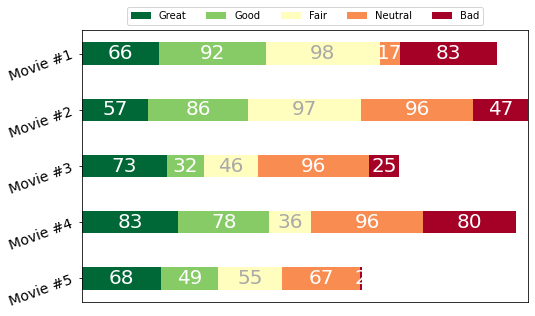

In [25]:
def plot_rating(df, class_names, cmap='RdYlGn_r', label_num_dec_place=0):
    df=df.copy()
    df_cumsum = df.cumsum(axis=1)
    format_label = f'%.{label_num_dec_place}f'
    
    class_colors = plt.colormaps[cmap](np.linspace(0, 1, df.shape[1]))
    
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(df, axis=1).max())
    
    for ind, (this_colname, this_color) in enumerate(zip(class_names, class_colors)):
        this_widths = df.iloc[:, ind]
        this_starts = df.cumsum(axis=1).iloc[:, ind] - this_widths
        this_labels = [f'{format_label}' % e for e in this_widths]
        bars = ax.barh(list(df.index), this_widths, left=this_starts,
                      height=0.4, label=this_colname, color=this_color)
        
        r, g, b, _ = this_color
        text_color = 'white' if r * g * b< 0.5 else 'darkgrey'
        ax.bar_label(bars, labels=this_labels, label_type='center', fontsize=20, color=text_color)
    ax.legend(ncol=len(class_names), loc='lower center', bbox_to_anchor=(0.5, 1), fontsize='medium')
    plt.yticks(rotation=20, fontsize=14)
    return fig, ax

plot_rating(df_rating[df_rating.columns[:-1]], class_list);

You can pass the percentage-based dataset to the same function to produce the corresponding horizontal bar plot for that dataset.

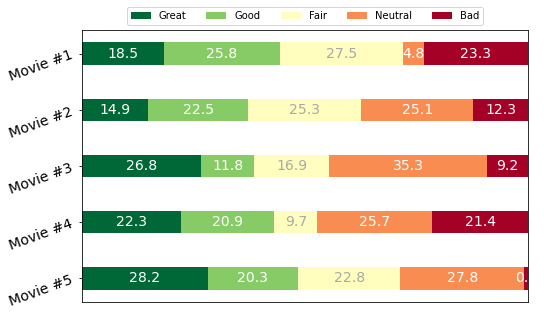

In [23]:
plot_rating(df_rating_percentage[df_rating_percentage.columns[:-1]], class_list,
           cmap = 'RdYlGn_r', label_num_dec_place=1);

### VISUALIZATION WITH MATPLOTLIB | ANNOTATED HEATMAPS.

Let us create two datasets representing our sales data related to different products and stores for two different time intervals:

In [26]:
index_labels = ['Product #1','Product #2', 'Product #3','Product #4',
                'Product #5','Product #6','Product #7','Product #8']
column_labels = ['Store #1','Store #2','Store #3','Store #4',
                'Store #5','Store #6','Store #7', 'Store #8']

np.random.seed(12345)
data_hm1 = np.random.randint(0,100, size=(len(column_labels), len(column_labels)))

np.random.seed(54321)
data_hm2 = np.random.randint(0, 100, size=(len(column_labels), len(column_labels)))

df_hm1 = pd.DataFrame(data=data_hm1, columns=column_labels, index=index_labels)
df_hm2 = pd.DataFrame(data=data_hm2, columns=column_labels, index=index_labels)

Here is the first Dataset:

In [27]:
df_hm1

,Store #1,Store #2,Store #3,Store #4,Store #5,Store #6,Store #7,Store #8
Product #1,98,29,1,36,41,34,29,1
Product #2,59,14,91,80,73,11,77,10
Product #3,81,82,38,7,43,23,29,56
Product #4,55,31,61,97,91,87,36,64
Product #5,3,5,15,75,14,81,5,34
Product #6,53,72,5,98,5,59,83,12
Product #7,14,80,27,38,88,96,5,74
Product #8,76,22,12,62,41,18,50,82


Second Dataset:

In [28]:
df_hm2

,Store #1,Store #2,Store #3,Store #4,Store #5,Store #6,Store #7,Store #8
Product #1,81,10,26,96,22,78,18,72
Product #2,71,10,98,11,38,63,12,30
Product #3,61,7,61,75,13,14,88,78
Product #4,30,71,84,71,62,92,64,87
Product #5,52,82,69,48,86,1,93,21
Product #6,43,51,78,85,63,16,70,63
Product #7,77,49,7,3,10,90,57,34
Product #8,76,38,9,67,31,70,93,28


The following Python code snippet provides two functions aiming at generating and formatting an annotated heatmap:

In [29]:
def label_heatmap(im, label_num_dec_place=0):
    labels = im.get_array()
    format_label = f'%.{label_num_dec_place}f'
    textcolors=('black','white')
    
    #threshold specifying the switch of text color
    threshold = im.norm(labels.max())/2.
    
    for i in range(labels.shape[0]):
        for j in range(labels.shape[1]):
            text_color =textcolors[int(im.norm(labels[i, j]) > threshold)]
            text = im.axes.text(j, i, f'{format_label}' % labels[i, j],
                               horizontalalignment='center',
                               verticalalignment='center',
                               color=text_color
                               )
        
def heatmap(df, ax, cbarlabel='', cmap='Greens', label_num_dec_place=0):
    df = df.copy()
    
    # ploting a blank heatmap
    im = ax.imshow(df.values, cmap)
    
    #create a customized colorbar
    cbar = ax.figure.colorbar(im, ax=ax, fraction=0.05, extend='both', extendfrac=0.05)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va='bottom', fontsize=18)
    
    #setting ticks
    ax.set_xticks(np.arange(df.shape[1]), labels=df.columns, fontsize=16)
    ax.set_yticks(np.arange(df.shape[0]), labels=list(df.index), fontsize=16)
    
    # proper placement of ticks
    ax.tick_params(axis='x', top=True, bottom=False,
                  labeltop=True, labelbottom=False)
    
    ax.spines[:].set_visible(False)
    #ax.set_xticks(np.arange(df.shape[1]+1) -.5, minor=True)
    #ax.set_yticks(np.arange(df.shape[0]+1) -.5, minor=True)
    #ax.set_xticks(np.arange(df.shape[1]+1) -0.5, minor=False)
    #ax.set_yticks(np.arange(df.shape[0]+1) -.5, minor=False)
    #ax.grid(which='both', visible='False', color='white', linestle='solid', linewidth=2)
    ax.grid(False)
    
    # Rotation of xtick labels
    plt.setp(ax.get_xticklabels(), rotation=-60,
            ha='right', rotation_mode=None)
    plt.setp(ax.get_yticklabels(), rotation=30)
    ax.tick_params(which='minor', bottom=False, left=False)
    
    label_heatmap(im, label_num_dec_place)

Here is how to use the developed functions above, to produce the annotated heatmaps for sales data for two different time intervals:

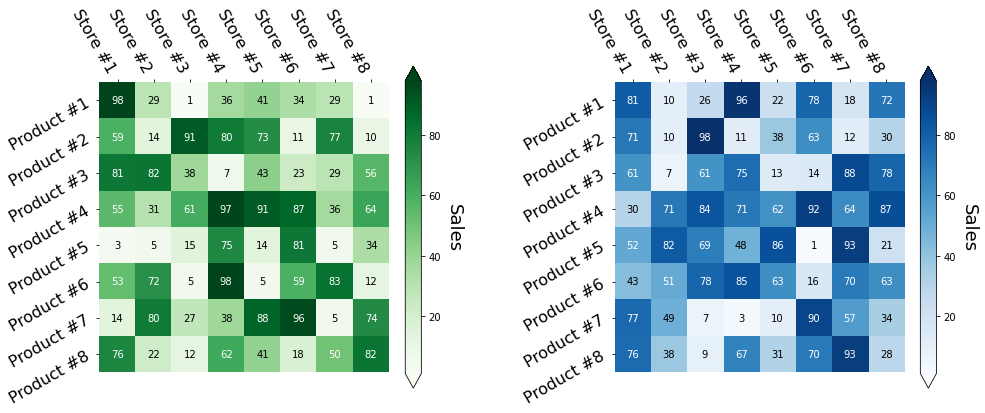

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(15,15))
heatmap(df=df_hm1, ax=ax[0], cbarlabel='Sales', cmap='Greens', label_num_dec_place=0)
heatmap(df=df_hm2, ax=ax[1], cbarlabel='Sales', cmap='Blues', label_num_dec_place=0)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.6, hspace=None)

### VISUALIZATION WITH MATPLOTLIB | USEFUL RESOURCES.

There are so many more types of beautiful and insightful plots that you can produce using the low-level library of matplotlib. You can find very helpful resources consisting of example plots and source codes from the https://matplotlib.org/stable/gallery/index.html or https://matplotlib.org/stable/users/resources/index.html.

### Summary.

low-level library of matplotlib provides with so many different visualization and formatting features, which allows the creation of highly-complex and informative data visualizations. The downside is that you need to develop a larger amount of code. 